In [1]:
import numpy as np
#%matplotlib inline
#import seaborn
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#seaborn.set_context('talk')

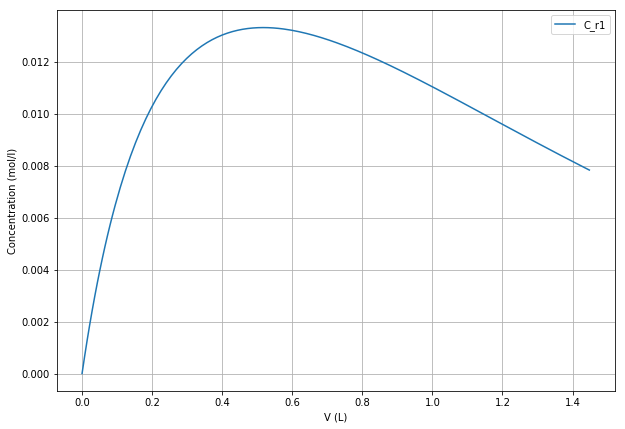

In [9]:
#Define initial conditions 
Cao=0.018 #[mol/l]
Cbo=0.05
Cco=0
Cr1o=0
Cr2o=0
inivalues=[Cao,Cbo,Cco,Cr1o,Cr2o]

#additional parameters
R=2 #cal/mol k
T=80+273.15
k1=4.87*10**6*np.exp(-10080/(R*T))
k2=3.49*10**3*np.exp(-5965/(R*T))
Vo=0
v=0.03
Vmax=1.448 #l


                  

# Set up the differential equations
def pfr(z,V):  
    [Ca,Cb,Cc,Cr1,Cr2]=z #assignment of dependent variables to convenient variable names
  

   
    #rate expressions
    r1a= -k1*Ca*Cb
    r2b= -k2*Cr1*Cb
    
    # net rate 
    ra = r1a+r2b
    rb = r1a+r2b
    rr1 = -r1a
    rc=-r1a-r2b
    rr2=-r2b
    
    #ODEs (mole balances for each and every species):
    dCadV = ra/v
    dCbdV = rb/v 
    dCcdV = rc/v
    dCr1dV= rr1/v
    dCr2dV= rr2/v
    
    return dCadV, dCbdV, dCcdV, dCr1dV, dCr2dV

# Setup ODE solver    
Vspan=np.linspace(0,Vmax,200)
solver = odeint(pfr,inivalues,Vspan) # solver output has format [X,y]
#print(solver)

# Plot results
plt.figure(figsize=(10,7))
plt.plot(Vspan,solver[:,3], label='C_r1')
plt.xlabel('V (L)')
plt.ylabel('Concentration (mol/l)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()
